# Student Performance Insights : From Cleaning to Clustering to Classification
## Name:Habiba abdullah said hammad

### Libraries used

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Data Prepration

Ok let's first start with downloading the dataset from UCI ML Repository

In [3]:
%pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo
ds = fetch_ucirepo(id=320)
X = ds.data.features
y = ds.data.targets


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Let's look at the meta data of the dataset 
meta data is data about data so we will have a deeper understanding of the dataset itself

In [4]:
ds.metadata

{'uci_id': 320,
 'name': 'Student Performance',
 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance',
 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv',
 'abstract': 'Predict student performance in secondary education (high school). ',
 'area': 'Social Science',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 649,
 'num_features': 30,
 'feature_types': ['Integer'],
 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'],
 'target_col': ['G1', 'G2', 'G3'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2008,
 'last_updated': 'Fri Jan 05 2024',
 'dataset_doi': '10.24432/C5TG7T',
 'creators': ['Paulo Cortez'],
 'intro_paper': {'ID': 360,
  'type': 'NATIVE',
  'title': 'Using data mining to predict secondary school student performance',
  'authors': 'P. Cortez, A. M. G. Silva',
  'venue': 'Proceedings of 5th Ann

This dataset is a *merged* view of the students math scores and porteguse scores
Ok looks like there are 649 students and 30 features. 
it also claims that there is no missing values or even symbols for missing values.
Let's take a look at the variables

In [15]:
pd.set_option("display.max_colwidth",None)
ds.variables

,name,role,type,demographic,description,units,missing_values
0,school,Feature,Categorical,None,student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira),None,no
1,sex,Feature,Binary,Sex,student's sex (binary: 'F' - female or 'M' - male),None,no
2,age,Feature,Integer,Age,student's age (numeric: from 15 to 22),None,no
3,address,Feature,Categorical,None,student's home address type (binary: 'U' - urban or 'R' - rural),None,no
4,famsize,Feature,Categorical,Other,family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3),None,no
5,Pstatus,Feature,Categorical,Other,parent's cohabitation status (binary: 'T' - living together or 'A' - apart),None,no
6,Medu,Feature,Integer,Education Level,"mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)",None,no
7,Fedu,Feature,Integer,Education Level,"father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)",None,no
8,Mjob,Feature,Categorical,Occupation,"mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",None,no
9,Fjob,Feature,Categorical,Occupation,"father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",None,no


Ok so most features here are integers except for 
- school 
- sex 
- famsize
- Mjob (Mother's Job)
- Fjob (Father's Job)
- Guardian 


So these would need encoding and given that there are binary features we can one-hot encode them for consistency.
Now let's look at the dataset itself.


In [16]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [8]:
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


Ok for reproduciatlity , I will save the dataset as csv files in the Data folder

In [18]:
X.to_csv("E:\Summer Semester 2\Training\Final Project\Data\student_features.csv",index=False)
y.to_csv("E:\Summer Semester 2\Training\Final Project\Data\student_targets.csv",index=False)

Now that that's setteled, Let's check for duplicates and missing values

In [19]:
dup_count=X.duplicated().sum()
dup_count

0

In [22]:
missing_count=X.isnull().sum()
missing_count

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

Ok so no duplicates or null values , let's now check for outliers , I will use the IQR method since it is the most simple and when plotted in a box plot it makes it easier to detect outliers while still vieweing the distribution of the features.

This function will check for outliers for all the numeric values 

In [26]:
def detect_outliers_iqr(df, threshold=1.5):
    outlier_summary = {}

    for col in df.select_dtypes(include=["int64"]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = {
            "outlier_count": outliers.shape[0],
            "lower_bound": lower,
            "upper_bound": upper,
            "min_value": df[col].min(),
            "max_value": df[col].max()
        }
    return pd.DataFrame(outlier_summary).T.sort_values("outlier_count", ascending=False)


And this function is to plot boxplots

In [29]:
def plot_outliers_boxplots(df):
    numeric_cols = df.select_dtypes(include=["int64"]).columns
    n = len(numeric_cols)

    rows = (n // 2) + (n % 2)
    plt.figure(figsize=(12, 4*rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, 2, i)
        sns.boxplot(x=df[col], color="skyblue")
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [27]:
outlier_report=detect_outliers_iqr(X)
outlier_report

,outlier_count,lower_bound,upper_bound,min_value,max_value
failures,100.0,0.0,0.0,0.0,3.0
famrel,51.0,2.5,6.5,1.0,5.0
freetime,45.0,1.5,5.5,1.0,5.0
studytime,35.0,-0.5,3.5,1.0,4.0
Dalc,34.0,-0.5,3.5,1.0,5.0
absences,21.0,-9.0,15.0,0.0,32.0
traveltime,16.0,-0.5,3.5,1.0,4.0
age,1.0,13.0,21.0,15.0,22.0
Medu,0.0,-1.0,7.0,0.0,4.0
Fedu,0.0,-2.0,6.0,0.0,4.0


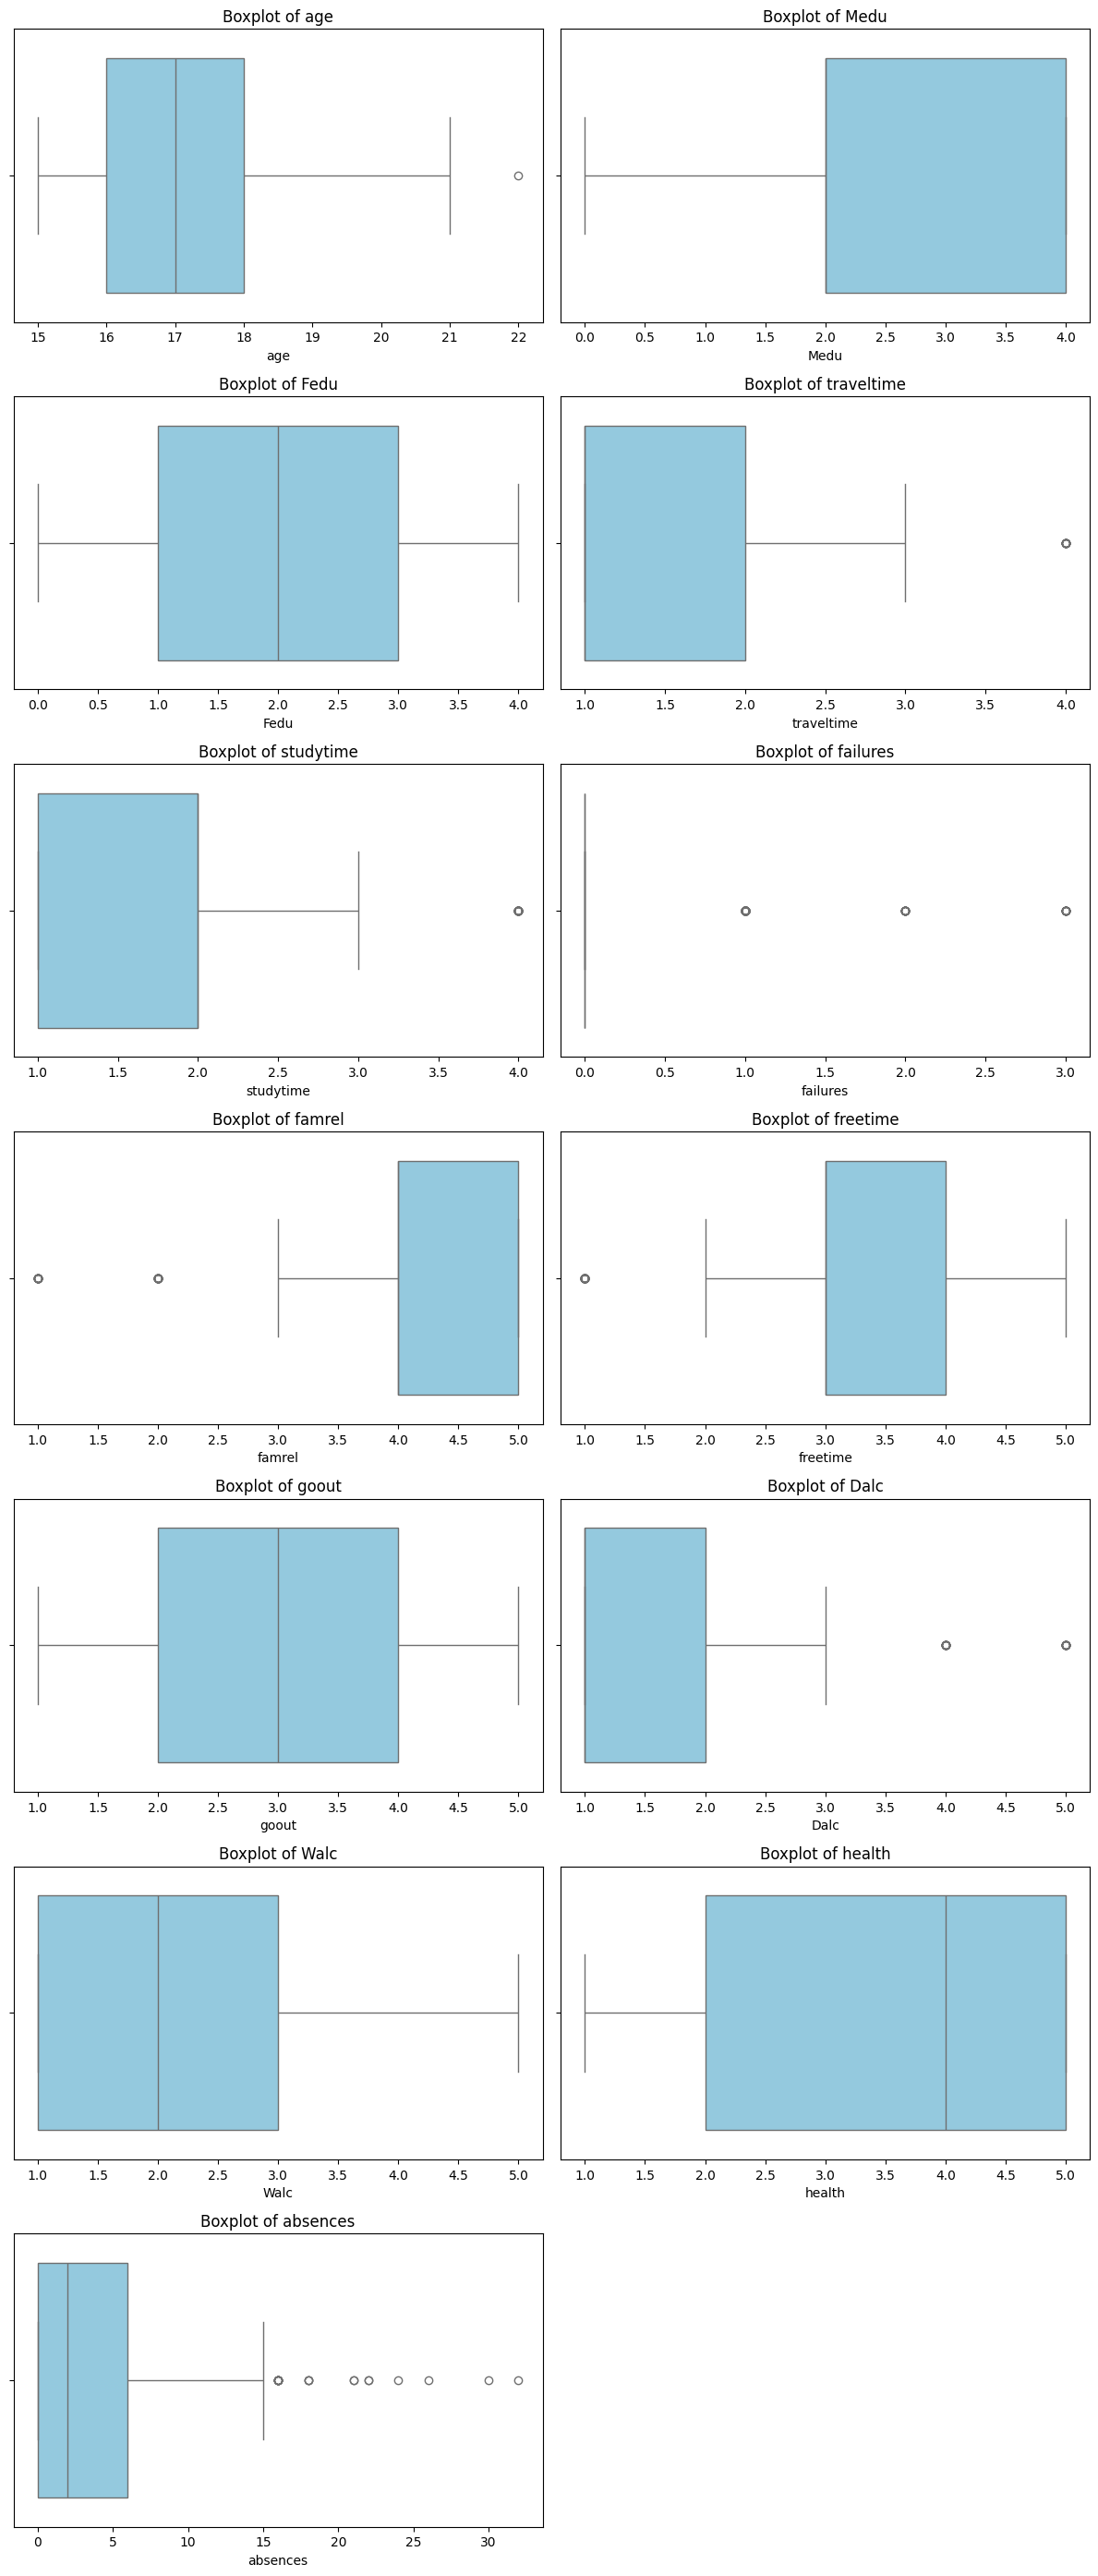

In [30]:
plot_outliers_boxplots(X)

Looking at the features , absences at first glance look a little off but after some thinking , yes some students can have be absent for most of the year (Reasons could be Travel) but to not let it affect the model , we can replace the values beyond a threshold with the nearest non-outlier value.

Now for featues like Famrel , FreeTime and Dalc (Daily alcoholic consumption) have some outliers but theya re not significant and are also logical. 

Finally , the failures feature , at first glance , looks like it needs to be dropped right away but actually it is an ordinal Categorical value with values ranging from 0 (no past failures) to 3 (3 or more past failures)

Let's cap absences at 95th percentile for top 5% of values above 30 

In [35]:
upper=X['absences'].quantile(0.95)
X['absences']=X['absences'].clip(upper=upper)

C:\Users\20115\AppData\Local\Temp\ipykernel_7384\3859072732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['absences']=X['absences'].clip(upper=upper)


In [37]:
X['absences'].describe()

count    649.000000
mean       3.377504
std        3.748768
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       12.000000
Name: absences, dtype: float64

Now the maximum value is 12 absences. Let's go on to the target features

In [32]:
outlier_target_report=detect_outliers_iqr(y)
outlier_target_report

,outlier_count,lower_bound,upper_bound,min_value,max_value
G2,25.0,5.5,17.5,0.0,19.0
G1,16.0,5.5,17.5,0.0,19.0
G3,16.0,4.0,20.0,0.0,19.0


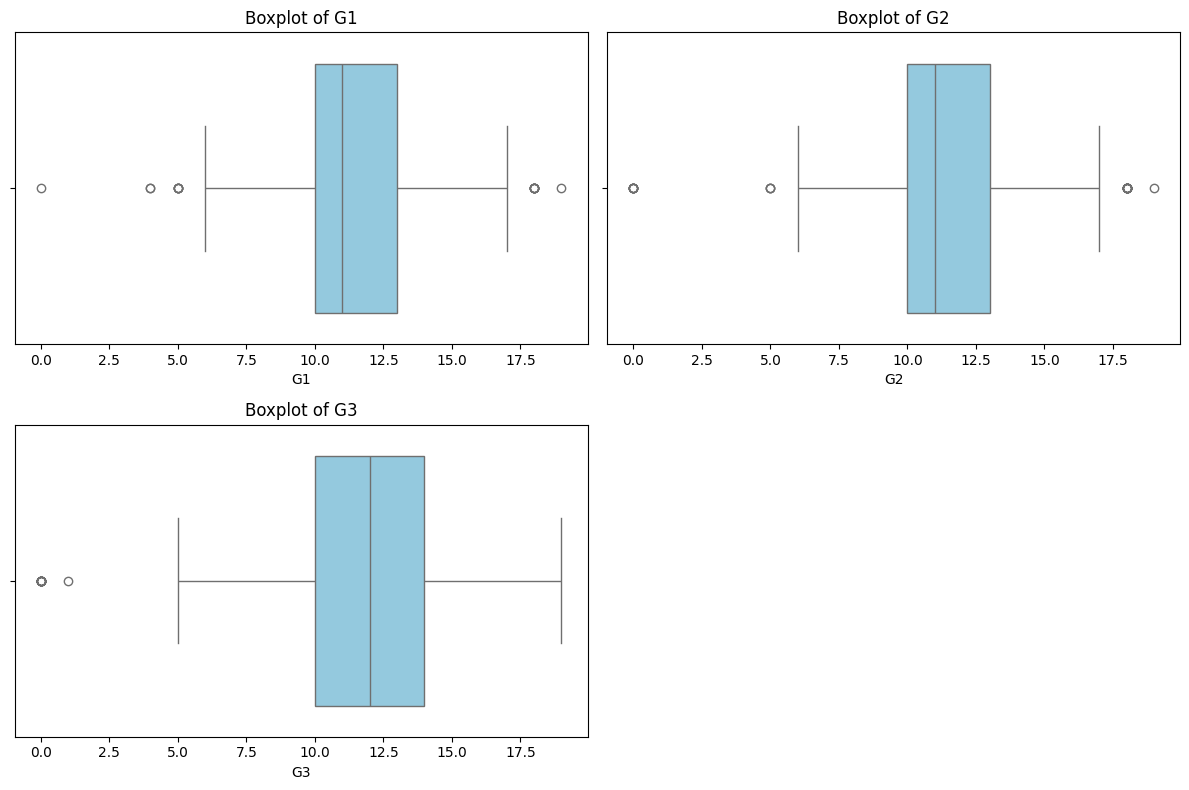

In [33]:
plot_outliers_boxplots(y)

So looking at the target features , there seemes to be no issue since they are withtin the range of 0-20 which is stated in the 'variable_info' in the metadata. Yes there is some outliers but they are logical since students can get a zero or get a below average score therfore the target dataframe stays as is.

### Data Transformation

### EDA

### Visualization

### Unsupervised Learning

### Supervised Learning

### Model Evaluation and Comparison

### Storytelling and Recommendations